# Olympic Data Analysis
## Inspiration and Defining Problem

Tokyo 2020 Olympics was over just recently -- with America, China, and Japan winning most medals respectively. While I don't really follow Olympic games that much, the one held this year did garner more attention (especially with current circumstances). It led me to look up the countries participating and the history revolving around them. Medal count was also something that caught my eye. I was very surprised to see the overwhelming gap of medals between US and the rest of the countries. I wanted to find out which attributes help athletes to win and decided to base my project off of this. 

1) Which teams are most of the participants who got medals from? Summer? Winter? Both?

Expectation: teams from countries that are more developed (US at the top)

2) What is the age, height, and weight distribution of the participants? By Sex?

Expectation: not so sure about weight... but I think height may play role. I suspect for age most athletes are between 20-30. Height and weight distribution for male and female could have more difference than age.

3) What is the distrubution of sex and how has it changed over time?

Expectation: more male participation than female as the games started... though this should change over time.

4) What sports are have the most medals?

Expectation: this is just based off of gold medalists I've heard in the news -- athletics, gymnastics, swimming.

Though I focused more on the general EDA, I also attempted to make a classification decision tree model to identfiy what attributes do athletes have that help in winning a gold medal.



### Column Name Definition
ID - Unique number for each athlete

Name - Athlete's name

Sex - M or F

Age - Integer

Height - In centimeters

Weight - In kilograms

Team - Team name

NOC - National Olympic Committee 3-letter code

Games - Year and season

Year - Integer

Season - Summer or Winter

City - Host city

Sport - Sport

Event - Event

Medal - Gold, Silver, Bronze, or NA

## Gather and Explore Data

In [2]:
#Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
#get dataframe
olympics_df = pd.read_csv('Olympics.csv')
olympics_df.head(15)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [4]:
olympics_df.shape[0]

271116

#### Correction after review:

I decided to drop duplicate data.

In [38]:
#drop duplicate
olympics_df.drop_duplicates(subset = ['Name', 'Team', 'Year', 'Games', 'Event'], inplace = True)
olympics_df.head(15)

,index,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Only_Year,Medals_Gold
0,3,4,Edgar Lindenau Aabye,M,34.0,157.0,99.0,Denmark/Sweden,DEN,1900 Summer,1900-01-01,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900,1
1,37,15,Arvo Ossian Aaltonen,M,30.0,191.0,53.0,Finland,FIN,1920 Summer,1920-01-01,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920,0
2,38,15,Arvo Ossian Aaltonen,M,30.0,145.0,141.0,Finland,FIN,1920 Summer,1920-01-01,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920,0
3,40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014-01-01,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,2014,0
4,41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948-01-01,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,1948,0
5,42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948-01-01,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,1948,1
6,44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948-01-01,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,1948,1
7,48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948-01-01,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,1948,1
8,50,17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952-01-01,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze,1952,0
9,60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992-01-01,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,1992,1


In [4]:
#Check number of rows and columns
olympics_df.shape[0]

268972

In [5]:
#Check Data Type
olympics_df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

Year is an int. Let's first convert that to datetime. To do this, I converted it to a string and then added another column named Only_Year that contains just the year as a datetime datatype.

In [6]:
olympics_df['Year'] = pd.to_datetime(olympics_df['Year'].astype(str))
olympics_df['Only_Year'] = olympics_df['Year'].dt.year
olympics_df.dtypes

ID                    int64
Name                 object
Sex                  object
Age                 float64
Height              float64
Weight              float64
Team                 object
NOC                  object
Games                object
Year         datetime64[ns]
Season               object
City                 object
Sport                object
Event                object
Medal                object
Only_Year             int64
dtype: object

In [7]:
#Check null values

olympics_df.isnull().sum()

ID                0
Name              0
Sex               0
Age            9185
Height        58085
Weight        60793
Team              0
NOC               0
Games             0
Year              0
Season            0
City              0
Sport             0
Event             0
Medal        229305
Only_Year         0
dtype: int64

Here we can see that age, height, weight, and medals contain null values.

After looking up a few athletes with and without missing values in medals column, it was safe to assume
that the missing values here indicate athletes who didn't win any medals. So I decided to remove them.

In [8]:
olympics_df.dropna(axis=0, how='any', subset=['Medal'], inplace=True)
olympics_df.reset_index(inplace=True)

In [9]:
olympics_df.head()

,index,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Only_Year
0,3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900-01-01,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900
1,37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920-01-01,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920
2,38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920-01-01,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920
3,40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014-01-01,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,2014
4,41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948-01-01,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,1948


In [10]:
olympics_df.shape[0]

39667

Our dataframe has become smaller and more manageable now. Let's see how many NaN values are left.

In [11]:
olympics_df.isnull().sum()

index           0
ID              0
Name            0
Sex             0
Age           698
Height       8607
Weight       9223
Team            0
NOC             0
Games           0
Year            0
Season          0
City            0
Sport           0
Event           0
Medal           0
Only_Year       0
dtype: int64

In [12]:
olympics_df.describe()

,index,ID,Age,Height,Weight,Only_Year
count,39667.000000,39667.000000,38969.000000,31060.000000,30444.000000,39667.000000
mean,137901.434669,69420.390829,25.908286,177.557920,73.775254,1974.118234
std,77920.503736,38844.709878,5.882276,10.893874,15.016926,33.683742
min,3.000000,4.000000,10.000000,136.000000,28.000000,1896.000000
25%,71753.000000,36517.500000,22.000000,170.000000,63.000000,1952.000000
50%,137303.000000,69025.000000,25.000000,178.000000,73.000000,1984.000000
75%,206073.500000,103453.000000,29.000000,185.000000,83.000000,2002.000000
max,271103.000000,135563.000000,73.000000,223.000000,182.000000,2016.000000


Initially, I thought I would just fill the NaN values with either the mean or the median of the set. However, when I progressed further into the project, I realized this caused a little bit of distortion within the graphs and results so I decided instead to fill these values with random numbers.

This was something new I found out there was a package that could help with that. I first imported the random module that would help me in generating random numbers. To handle height, I created a list where numbers from 136(minimum height) to 223(maximum height) would be added for a range of 8711(number of NaN in height). I used a loop to create the list.

Then, using the fillna, I filled the Height column with each value in the list to the corresponding NaN.

In [13]:
#import packages
import random
from random import seed
from random import randint
seed(1)

#create list
random_list_height = [random.randint(136, 223) for i in range(8607)]

#add result to NaN values by choosing a random number from random_list_height
olympics_df['Height'] = olympics_df['Height'].fillna(pd.Series(np.random.choice(random_list_height, size=len(olympics_df.index))))
olympics_df

,index,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Only_Year
0,3,4,Edgar Lindenau Aabye,M,34.0,157.0,NaN,Denmark/Sweden,DEN,1900 Summer,1900-01-01,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900
1,37,15,Arvo Ossian Aaltonen,M,30.0,191.0,NaN,Finland,FIN,1920 Summer,1920-01-01,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920
2,38,15,Arvo Ossian Aaltonen,M,30.0,145.0,NaN,Finland,FIN,1920 Summer,1920-01-01,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920
3,40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014-01-01,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,2014
4,41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948-01-01,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,1948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39662,271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956-01-01,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,1956
39663,271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964-01-01,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,1964
39664,271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980-01-01,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze,1980
39665,271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000-01-01,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,2000


I did this for weight and age too.

In [14]:
random_list_weight = [random.randint(28, 182) for i in range(9223)]
for i in range(len(random_list_weight)):
    random_list_weight[i]

olympics_df['Weight'] = olympics_df['Weight'].fillna(pd.Series(np.random.choice(random_list_weight, size=len(olympics_df.index))))
olympics_df

,index,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Only_Year
0,3,4,Edgar Lindenau Aabye,M,34.0,157.0,99.0,Denmark/Sweden,DEN,1900 Summer,1900-01-01,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900
1,37,15,Arvo Ossian Aaltonen,M,30.0,191.0,53.0,Finland,FIN,1920 Summer,1920-01-01,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920
2,38,15,Arvo Ossian Aaltonen,M,30.0,145.0,141.0,Finland,FIN,1920 Summer,1920-01-01,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920
3,40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014-01-01,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,2014
4,41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948-01-01,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,1948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39662,271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956-01-01,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,1956
39663,271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964-01-01,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,1964
39664,271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980-01-01,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze,1980
39665,271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000-01-01,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,2000


In [15]:
random_list_age = [random.randint(10, 73) for i in range(698)]
for i in range(len(random_list_age)):
    random_list_age[i]

olympics_df['Age'] = olympics_df['Age'].fillna(pd.Series(np.random.choice(random_list_age, size=len(olympics_df.index))))
olympics_df

,index,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Only_Year
0,3,4,Edgar Lindenau Aabye,M,34.0,157.0,99.0,Denmark/Sweden,DEN,1900 Summer,1900-01-01,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900
1,37,15,Arvo Ossian Aaltonen,M,30.0,191.0,53.0,Finland,FIN,1920 Summer,1920-01-01,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920
2,38,15,Arvo Ossian Aaltonen,M,30.0,145.0,141.0,Finland,FIN,1920 Summer,1920-01-01,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920
3,40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014-01-01,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,2014
4,41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948-01-01,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,1948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39662,271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956-01-01,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,1956
39663,271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964-01-01,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,1964
39664,271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980-01-01,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze,1980
39665,271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000-01-01,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,2000


In [16]:
olympics_df.isnull().sum()

index        0
ID           0
Name         0
Sex          0
Age          0
Height       0
Weight       0
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
Only_Year    0
dtype: int64

Since I am only focusing on gold medalists, I decided to create another column to reflict that (binary).

In [17]:
gold = olympics_df['Medal'] == 'Gold' #correction
olympics_df['Medals_Gold'] = gold*1
olympics_df 

,index,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Only_Year,Medals_Gold
0,3,4,Edgar Lindenau Aabye,M,34.0,157.0,99.0,Denmark/Sweden,DEN,1900 Summer,1900-01-01,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900,1
1,37,15,Arvo Ossian Aaltonen,M,30.0,191.0,53.0,Finland,FIN,1920 Summer,1920-01-01,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920,0
2,38,15,Arvo Ossian Aaltonen,M,30.0,145.0,141.0,Finland,FIN,1920 Summer,1920-01-01,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920,0
3,40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014-01-01,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,2014,0
4,41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948-01-01,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,1948,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39662,271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956-01-01,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,1956,0
39663,271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964-01-01,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,1964,0
39664,271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980-01-01,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze,1980,0
39665,271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000-01-01,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,2000,0


All null values are taken care of.

I then decided to filter the dataframe a little bit more to make it easier to work with

In [18]:
#Remove uneccessary columns
cols = ['Sex', 'Age', 'Height', 'Weight', 'Team', 'Only_Year', 'Season', 'Sport', 'Medals_Gold']
n_olympics_df = olympics_df[cols]
n_olympics_df

,Sex,Age,Height,Weight,Team,Only_Year,Season,Sport,Medals_Gold
0,M,34.0,157.0,99.0,Denmark/Sweden,1900,Summer,Tug-Of-War,1
1,M,30.0,191.0,53.0,Finland,1920,Summer,Swimming,0
2,M,30.0,145.0,141.0,Finland,1920,Summer,Swimming,0
3,M,28.0,184.0,85.0,Finland,2014,Winter,Ice Hockey,0
4,M,28.0,175.0,64.0,Finland,1948,Summer,Gymnastics,0
...,...,...,...,...,...,...,...,...,...
39662,F,25.0,168.0,80.0,Soviet Union,1956,Summer,Athletics,0
39663,F,33.0,168.0,80.0,Soviet Union,1964,Summer,Athletics,0
39664,M,28.0,182.0,82.0,Poland,1980,Summer,Fencing,0
39665,F,19.0,171.0,64.0,Russia,2000,Summer,Athletics,0


Again we are trying to focus on attributes that led to athletes winning a gold medal so I decided to drop all the rows where Medals_Gold = 0.

In [19]:
n_olympics_df = n_olympics_df[n_olympics_df.Medals_Gold != 0]
n_olympics_df

,Sex,Age,Height,Weight,Team,Only_Year,Season,Sport,Medals_Gold
0,M,34.0,157.0,99.0,Denmark/Sweden,1900,Summer,Tug-Of-War,1
5,M,28.0,175.0,64.0,Finland,1948,Summer,Gymnastics,1
6,M,28.0,175.0,64.0,Finland,1948,Summer,Gymnastics,1
7,M,28.0,175.0,64.0,Finland,1948,Summer,Gymnastics,1
9,M,20.0,176.0,85.0,Norway,1992,Winter,Alpine Skiing,1
...,...,...,...,...,...,...,...,...,...
39648,M,23.0,182.0,90.0,Georgia,2004,Summer,Judo,1
39651,F,28.0,167.0,60.0,Germany,2004,Summer,Hockey,1
39655,M,29.0,200.0,93.0,Netherlands,1996,Summer,Volleyball,1
39660,M,31.0,197.0,93.0,Netherlands,1996,Summer,Rowing,1


## EDA

For the EDA section, I will be trying to answer the questions I previously formed in the beginning.

1) Which teams are most of the participants who got medals from? Summer? Winter? Both?

2) What is the age, height, and weight distribution of the participants? By Sex?

3) What is the distrubution of sex and how has it changed over time?

4) What sports are have the most medals?

### 1) Which countries are most of the participants who got medals from? Summer? Winter? Both?

To answer this I created a variable that stores the total number of athletes from five teams in descending order

In [20]:
top_teams = n_olympics_df.Team.value_counts().sort_values(ascending=False).head(5)
top_teams

United States    2474
Soviet Union     1058
Germany           679
Italy             534
Great Britain     518
Name: Team, dtype: int64

I initially used matplotlib to graph data. However, it got very tedious and I ended up browsing for other libraries that may help. Plotly and seaborn were a few I came across. Plotly even has a function where it can plot maps. Howeved, I ended up using seaborn because it wasn't something I needded to install from scratch.

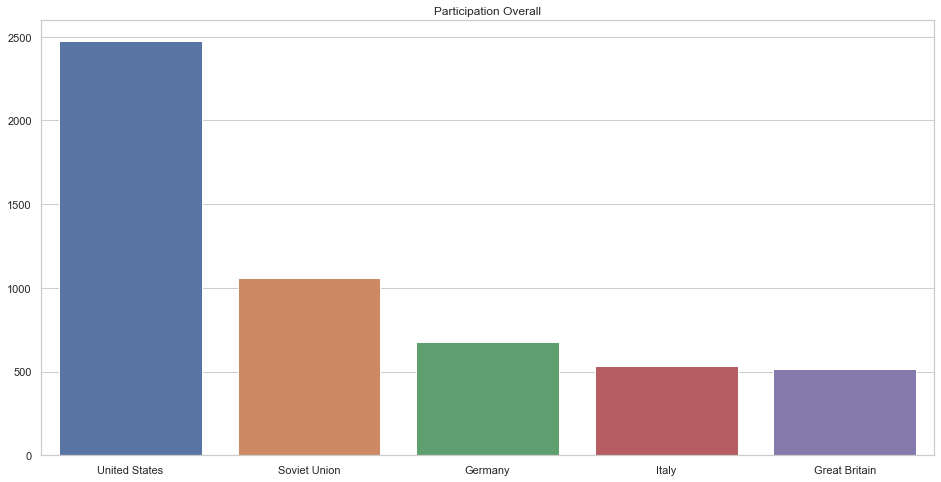

In [21]:
#Import seaborn package
import seaborn as sns

#set the style of grid
sns.set(style='whitegrid')

#figure size
plt.figure(figsize=(16,8))

#plot
sns.barplot(x=top_teams.index, y=top_teams.values)

#Title
plt.title('Participation Overall')
plt.show()



We can see that United States has won the most medals followed by the Soviet Union. There is a considerable difference here.

Let's see if the summer and winter games have the same results

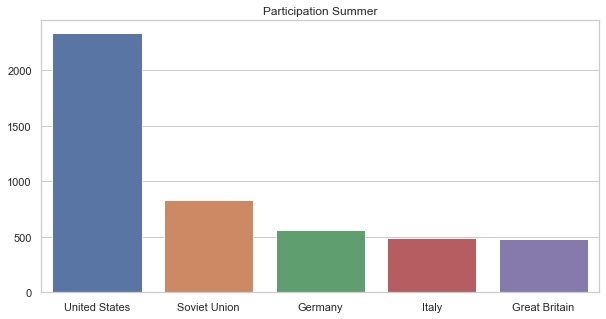

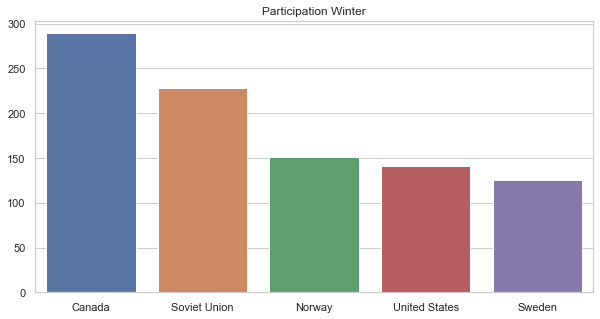

In [22]:
#create dataframe with only summer games
summer_group = n_olympics_df.groupby(n_olympics_df['Season'])
teams_summer = summer_group.get_group('Summer')

#find top teams during the summer
top_teams_summer = teams_summer.Team.value_counts().sort_values(ascending=False).head(5)
top_teams_summer.reset_index()

#create dataframe with only winter games
winter_group = n_olympics_df.groupby(n_olympics_df['Season'])
teams_winter = winter_group.get_group('Winter')

#find top teams during the summer
top_teams_winter = teams_winter['Team'].value_counts().sort_values(ascending=False).head(5)
top_teams_winter.reset_index()

#plot both
plt.figure(figsize=(10,5))
sns.barplot(x=top_teams_summer.index, y=top_teams_summer.values)
plt.title('Participation Summer')

plt.figure(figsize=(10,5))
sns.barplot(x=top_teams_winter.index, y=top_teams_winter.values)
plt.title('Participation Winter')
plt.show()

So there is a difference between the summer and winter games. Let's look more into why that may be by checking the number of sports in both categories.

In [23]:
#list of sports in the summer
sports_summer = n_olympics_df[n_olympics_df.Season=='Summer']['Sport'].unique()
sports_summer

array(['Tug-Of-War', 'Gymnastics', 'Handball', 'Sailing', 'Cycling',
       'Canoeing', 'Football', 'Water Polo', 'Rowing', 'Golf', 'Hockey',
       'Wrestling', 'Boxing', 'Basketball', 'Athletics', 'Baseball',
       'Taekwondo', 'Shooting', 'Volleyball', 'Equestrianism', 'Diving',
       'Swimming', 'Tennis', 'Fencing', 'Badminton', 'Rugby',
       'Weightlifting', 'Judo', 'Beach Volleyball', 'Rhythmic Gymnastics',
       'Archery', 'Triathlon', 'Softball', 'Polo', 'Modern Pentathlon',
       'Racquets', 'Croquet', 'Synchronized Swimming', 'Art Competitions',
       'Cricket', 'Rugby Sevens', 'Ice Hockey', 'Lacrosse',
       'Figure Skating', 'Table Tennis', 'Basque Pelota', 'Trampolining',
       'Alpinism', 'Motorboating', 'Jeu De Paume', 'Roque', 'Aeronautics'],
      dtype=object)

In [24]:
#list of sports in the winter
sports_winter = n_olympics_df[n_olympics_df.Season=='Winter']['Sport'].unique()
sports_winter

array(['Alpine Skiing', 'Speed Skating', 'Nordic Combined', 'Ice Hockey',
       'Bobsleigh', 'Curling', 'Biathlon', 'Cross Country Skiing',
       'Figure Skating', 'Ski Jumping', 'Short Track Speed Skating',
       'Snowboarding', 'Luge', 'Military Ski Patrol', 'Freestyle Skiing',
       'Skeleton', 'Alpinism'], dtype=object)

#### Conclusion for 1
Top 5 countries (overall) with medalists are United States, Soviet Union, Germany, Great Britain, and France
It's clear that the summer games have more medalists than winter games thus affecting the overall graph.
This made me research the seasonal games more and I found out that up until 1994, both summer and winter olympics 
were held in the same year. Maybe this affected athletes motivation and concentration. In general I found that the summer 
olympics are more popular than the winter ones. Summer also has more sports than winter.

### 2) What is the age, height, and weight distribution of the participants? By Sex?

To answer this, I first created two seperate dataframes for both male and female. Then I plotted the overall age distribution, male age distribution, female age distribution.

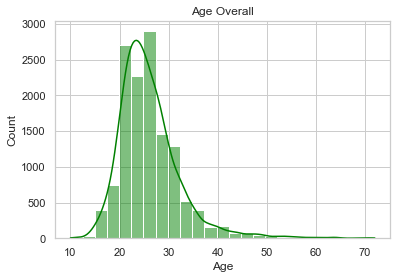

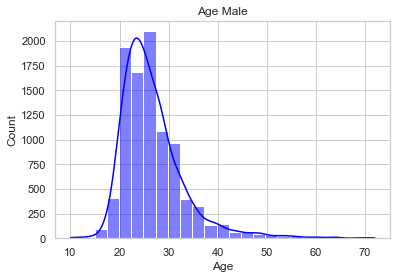

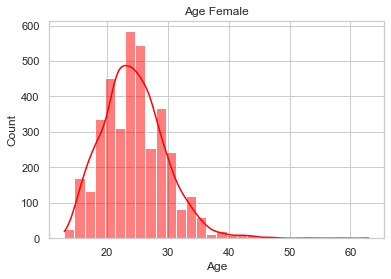

In [25]:
#create dataframe with only male
a_male = n_olympics_df.groupby(n_olympics_df['Sex'])
male = a_male.get_group('M')

#create dataframe with only female
a_female = n_olympics_df.groupby(n_olympics_df['Sex'])
female = a_female.get_group('F')

#Plot each histogram: overall, male, female
sns.histplot(data=n_olympics_df, x='Age', color='green', kde=True, bins=25).set(title='Age Overall')
plt.show()
sns.histplot(data=male, x='Age', color='blue', kde=True, bins=25).set(title='Age Male')
plt.show()
sns.histplot(data=female, x='Age', color='red', kde=True,bins=30).set(title='Age Female')
plt.show()

Most athletes are in their mid-twenties. The distribution is more evenly curved for females than it is for males.


Next I decided to see the height and weight distribution. First I wanted to see the overall distribution. Then I wanted to compare male and female distribtion to see if there is any difference in that.

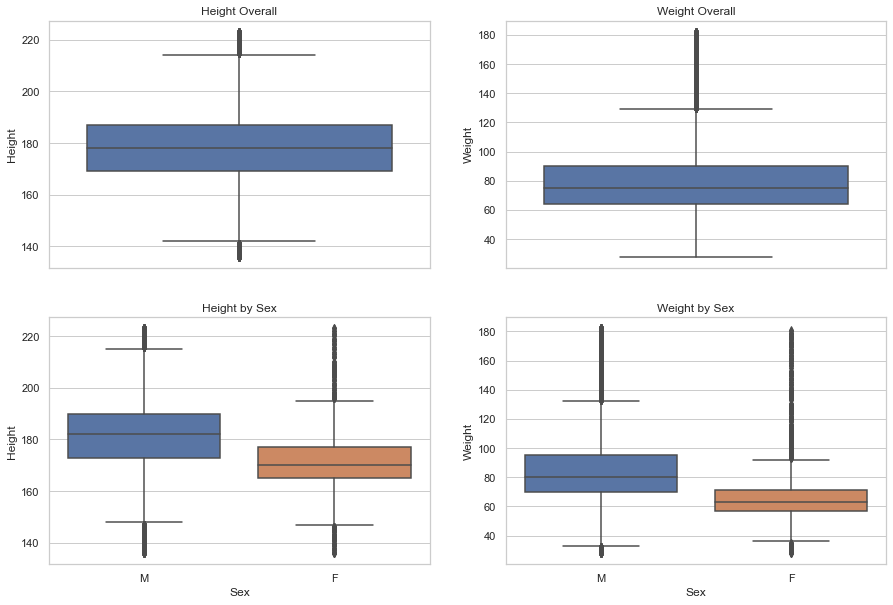

In [26]:
#Make subplot
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

#plot
sns.boxplot(y=n_olympics_df['Height'], width = 0.8, ax=axs[0, 0]).set(title='Height Overall');
sns.boxplot(y=n_olympics_df['Weight'], width = 0.8, ax=axs[0, 1]).set(title='Weight Overall');
sns.boxplot(y=n_olympics_df['Height'], x=n_olympics_df['Sex'], width = 0.8, ax=axs[1, 0]).set(title='Height by Sex');
sns.boxplot(y=n_olympics_df['Weight'], x=n_olympics_df['Sex'], width = 0.8, ax=axs[1, 1]).set(title='Weight by Sex');

plt.show()


#### Conclusion for 2
Regarding age, most athletes seem to be around their mid-twenties. Regarding height, most male athletes are
just over 180cm while females are a little under that. The range seems to be more for females. The same goes for weight
with females being in a lower range.

 ## 3) What is the distrubution of  sex and how has it changed over time?

For a quick look, I looked at the count of sex in the dataframe to get an idea of how the distribution might look.

In [27]:
s_count = n_olympics_df.Sex.value_counts()
s_count

M    9600
F    3745
Name: Sex, dtype: int64

There are more males than females. To get a visualization, I decided to use a pie chart to see this.

([<matplotlib.patches.Wedge at 0x181a17eabb0>,
 [Text(-0.6994889646124305, 0.8489494616203194, 'M'),
  Text(0.6994889646124304, -0.8489494616203195, 'F')],
 [Text(-0.3815394352431439, 0.46306334270199234, '71.9%'),
  Text(0.38153943524314377, -0.4630633427019924, '28.1%')])

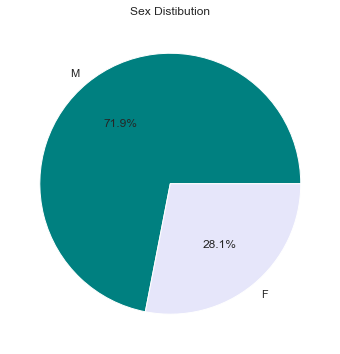

In [28]:
plt.figure(figsize=(12,6))
plt.title('Sex Distibution')

plt.pie(s_count, labels=s_count.index, autopct='%0.1f%%', colors=['teal','lavender'])

Male population make up around 3/4ths more than female population. It is important to note that this chart only makes up gold medalists. Personally, I don't think sex plays a role in whether somebody can win a gold or not because participants compete with their own sex.


To further look into this, it's better to use the original olympics_df dataset that has all the original columns and does not only consist of gold medalists.


I decided to do to plots (bar and line) to get two forms of visualization for the distribution of sex over the years.

Text(0.5, 1.0, 'Participating Winners Over the Years')

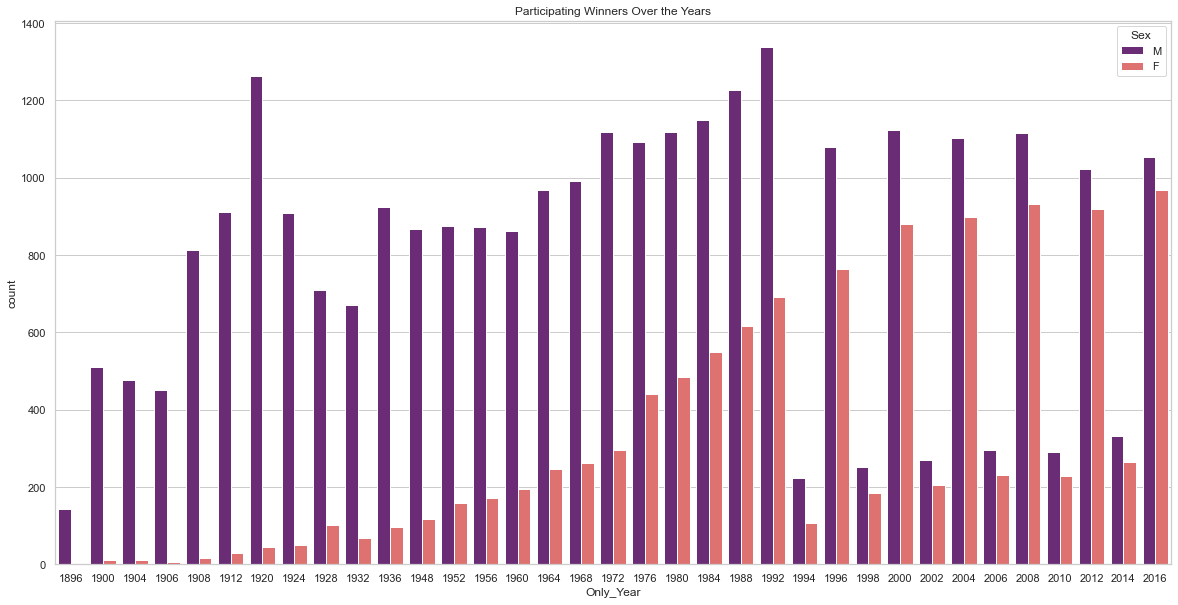

In [29]:
#set size
plt.figure(figsize=(20,10))

#plot year vs count for both male and female
sns.countplot(x='Only_Year', data=olympics_df, hue='Sex', palette='magma')
plt.title('Participating Winners Over the Years')

Text(0.5, 1.0, 'Participating Winners Over the Years')

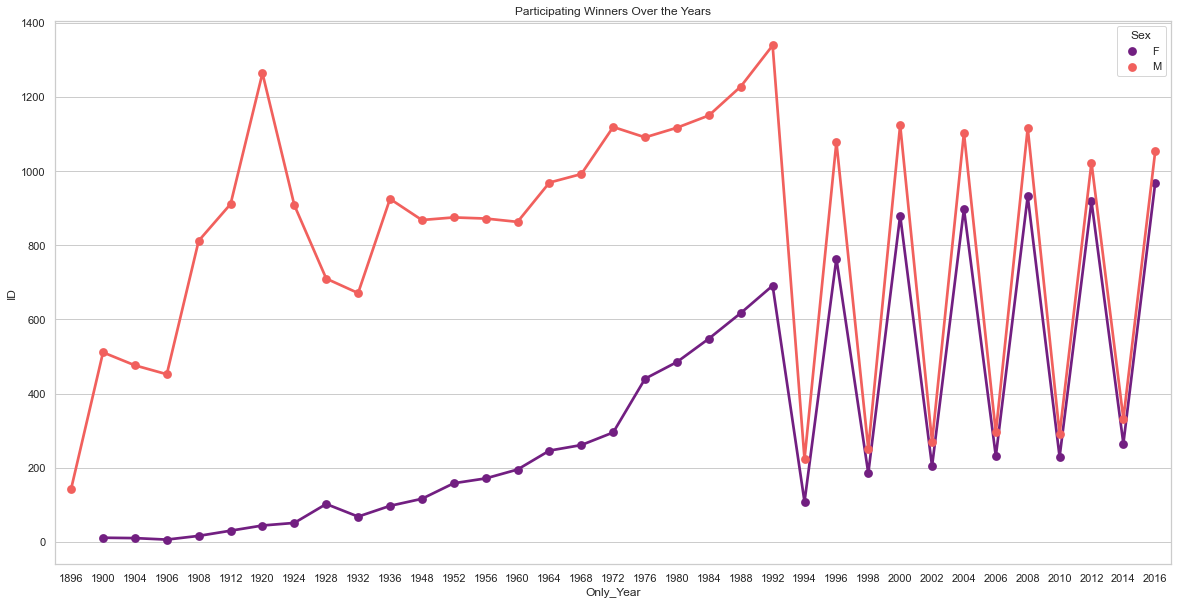

In [30]:
#set size
plt.figure(figsize=(20,10))

#line plot isn't as easy as countplot so first groupby using only sex and year
new_df = olympics_df.groupby(['Sex','Only_Year'], as_index=False)['ID'].count()

#plot figure
sns.pointplot(data=new_df, x='Only_Year', y='ID', hue='Sex', palette='magma')
plt.title('Participating Winners Over the Years')

### Conclusion for 3: 

Throughout the years there have been more males than females participating and winning. This makes sense 
because the olympics began before the 1900s. However, with time there are more women participating. 
From 1994 to 2016 there has been a dip every two years. This is because 1994 is the time when summer and winter olympics
were seperated and not played in the same year.

## 4) What sports are have the most medals?

First let's see how many total gold medals are there in the set.

In [31]:
n_olympics_df.shape[0]

13345

Let's then see the top 5 sports that won gold.

In [32]:
gold_sports = teams_summer[['Medals_Gold', 'Sport']].groupby(['Sport']).sum().sort_values(['Medals_Gold'], ascending=False)
gold_sports.reset_index()
gold_sports.head(5)

,Medals_Gold
Sport,
Athletics,1339
Swimming,1099
Rowing,973
Gymnastics,791
Fencing,594


Let's see the bottom 5 sports that won gold.

In [33]:
gold_sports.tail(5)

,Medals_Gold
Sport,
Racquets,3
Basque Pelota,2
Roque,1
Jeu De Paume,1
Aeronautics,1


I never knew aeronautics was a sport. A quick google search told me that it was only ever played once for some reason. I also found out that there are many sports that get added and removed over the years.

In [34]:
n_olympics_df[n_olympics_df['Sport'] == 'Aeronautics'].head(3)

,Sex,Age,Height,Weight,Team,Only_Year,Season,Sport,Medals_Gold
30894,M,26.0,150.0,125.0,Switzerland,1936,Summer,Aeronautics,1


### Conclusion for 4: 

From the table above, we can see that which sports have the most gold medals. Athletics is the sport
that has won the most gold. This must be mostly because the frequency of the top sports being played over the years 
is significantly higher than the bottom sports. Sports are constantly added and removed too... the concept of summer
and winter olympics also impact which sport is more popular.

## Modelling

Knowing all this, we can see that age, height, weight, team, and sport all play a role in the chances of winning 
a gold medal. Sex does not necessarily play a role since participants are competing with their own sex. With that in mind, 
I decided to create a final data frame with all these attributes to make the classification tree model

In [35]:
final_df_cols = ['Team', 'Sport', 'Age', 'Height', 'Weight', 'Medals_Gold']
final_df = olympics_df[final_df_cols]
final_df

,Team,Sport,Age,Height,Weight,Medals_Gold
0,Denmark/Sweden,Tug-Of-War,34.0,157.0,99.0,1
1,Finland,Swimming,30.0,191.0,53.0,0
2,Finland,Swimming,30.0,145.0,141.0,0
3,Finland,Ice Hockey,28.0,184.0,85.0,0
4,Finland,Gymnastics,28.0,175.0,64.0,0
...,...,...,...,...,...,...
39662,Soviet Union,Athletics,25.0,168.0,80.0,0
39663,Soviet Union,Athletics,33.0,168.0,80.0,0
39664,Poland,Fencing,28.0,182.0,82.0,0
39665,Russia,Athletics,19.0,171.0,64.0,0


In [36]:
# import decision tree for classifying
from sklearn.tree import DecisionTreeClassifier 
#import train_test_split to help split data into training and testing
from sklearn.model_selection import train_test_split
#import metrics to calculate accuracy of model
from sklearn import metrics 

#assign independent and dependent variables
y = final_df['Medals_Gold']
x = pd.get_dummies(final_df.drop('Medals_Gold', axis=1))

#split data into training and testing -- chose to split it 70% training and 30% testing, random state shuffles data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100) 


# make an decisiontreeclassfier -- chose max_depth 4 to reduce tree size, weight tries to ensure there is no bias towards data that appears often
clf = DecisionTreeClassifier(random_state=100, max_depth=4, min_samples_leaf=3,class_weight='balanced')

#train model
clf = clf.fit(x_train,y_train)

#predict for test set
y_pred = clf.predict(x_test)

#print accuracy
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6527182589698345


In [37]:
#export tree
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file='n_tree.dot', rounded=True, special_characters=True, feature_names = x.columns)

I am a little unsure how the decision tree was executed. The last section was something I had to study a bit more on because I kept getting confused on a regression tree and a classification tree. If I have done this right, then the model I created has an accuracy of 65% which isn't that bad.

## Closing Thoughts

First let's see if my expectations matched with what we found out
1) Which teams are most of the participants who got medals from? Summer? Winter? Both?

Expectation: teams from countries that are more developed (US at the top)

This is true. As we could see, countries like US, Canada, Britain, France were at the top. I suspect this has to do mostly because of their development -- more tying in with GDP. I actually had a conversation about this with someone where we discussed that the reason these countries do so well may have to do with their quality of life. Equipment and better training accessibilities is more prevelant in these countries. Additionally, I know from personal experience that countries like India are places where people are pushed more for academia and industry and not athletics.

One way, I could improve this model would be to bring in datasets that with country GDP and even population and merge them with this dataset to see what conclusions can be drawn.

2) What is the age, height, and weight distribution of the participants? By sex?

Expectation: not so sure about weight... but I think height may play role. I suspect for age most athletes are between 20-30. Height and weight distribution for male and female could have more difference than age.

I was surprised to see that there was not much of a difference in height and weight distribution between male and female. I expected the difference to be more since males and females do not exactly have the same physical capabilities. But I stand corrected.

3) What is the distribution of sex and how has it changed over time?

Expectation: more male participation than female as the games started... though this should change over time.

This is true. Given the time periods and the fact that the olympics has been around for over a century, it was evident that there would be less female representation at first but would gradually change over time.

4) What sports are have the most medals?

Expectation: this is just based off of gold medalists I've heard in the news -- athletics, gymnastics, swimming.

This is true. I suppose we could also say there is a correlation between the sports that appear on the news vs the medals won in that particular sport. I doubt media would speak more on the lesser known sports.

I think another way I could have I could have improved the model was to remove the lesser known sports (like ones only played once).